<a href="https://colab.research.google.com/github/vlad-danaila/ml-cancer-detection/blob/master/Cancer_Detection_Ensable_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download dependencies**

In [0]:
!pip3 install sklearn matplotlib GPUtil

     |████████████████████████████████| 13.1MB 9.2MB/s eta 0:00:01    |███████                         | 2.9MB 1.6MB/s eta 0:00:07
     |████████████████████████████████| 7.0MB 1.6MB/s eta 0:00:01
     |████████████████████████████████| 92kB 886kB/s eta 0:00:01
     |████████████████████████████████| 71kB 924kB/s  eta 0:00:01
     |████████████████████████████████| 25.2MB 13.8MB/s eta 0:00:01
     |████████████████████████████████| 296kB 5.1MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=2397 sha256=88b37279b092bf570262efc22dc6e959ad4ff05586b7c90daa95710c5d74d1da
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp36-none-any.whl size=8219 sha256=0c63eeba5358d05251cf3bed44d3e78285d90506649c4cf1edbc983cf9176e53
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built sk

In [0]:
!pip3 install torch==1.3.1+cu92 torchvision==0.4.2+cu92 -f https://download.pytorch.org/whl/torch_stable.html 

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 621.4MB 11kB/s  eta 0:00:011  |▌                               | 9.9MB 1.4MB/s eta 0:07:09     |█                               | 18.7MB 15.5MB/s eta 0:00:39     |██▋                             | 50.9MB 12.0MB/s eta 0:00:48     |████████▊                       | 170.1MB 9.2MB/s eta 0:00:50     |███████████▉                    | 230.1MB 14.5MB/s eta 0:00:27     |████████████▏                   | 237.2MB 11.2MB/s eta 0:00:35     |████████████▎                   | 238.9MB 11.2MB/s eta 0:00:35     |█████████████▏                  | 255.4MB 14.5MB/s eta 0:00:26     |█████████████▌                  | 262.1MB 14.5MB/s eta 0:00:25     |██████████████▎                 | 276.9MB 2.3MB/s eta 0:02:27     |████████████████▍               | 318.2MB 13.9MB/s eta 0:00:22     |████████████████▋               | 323.4MB 13.4MB/s eta 0:00:23     |█████████████████▍              | 337.0MB 14.5MB/s 

**Download Data**

Mount my google drive, where I stored the dataset.

In [0]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
except Exception as e:
    print(e)

No module named 'google.colab'


In order to acquire the dataset please navigate to:

https://ieee-dataport.org/documents/cervigram-image-dataset

Unzip the dataset into the folder "dataset".

For your environment, please adjust the paths accordingly.

In [0]:
!rm -vrf "dataset"
!mkdir "dataset"
# !cp -r "/content/drive/My Drive/Studiu doctorat leziuni cervicale/cervigram-image-dataset-v2.zip" "dataset/cervigram-image-dataset-v2.zip"
!cp -r "cervigram-image-dataset-v2.zip" "dataset/cervigram-image-dataset-v2.zip"
!unzip "dataset/cervigram-image-dataset-v2.zip" -d "dataset"

removed directory 'dataset'
Archive:  dataset/cervigram-image-dataset-v2.zip
   creating: dataset/data/
   creating: dataset/data/test/
   creating: dataset/data/test/0/
   creating: dataset/data/test/0/20151103002/
  inflating: dataset/data/test/0/20151103002/20151103113458.jpg  
  inflating: dataset/data/test/0/20151103002/20151103113637.jpg  
  inflating: dataset/data/test/0/20151103002/20151103113659.jpg  
  inflating: dataset/data/test/0/20151103002/20151103113722.jpg  
  inflating: dataset/data/test/0/20151103002/20151103113752.jpg  
  inflating: dataset/data/test/0/20151103002/20151103113755.jpg  
  inflating: dataset/data/test/0/20151103002/20151103113833.jpg  
   creating: dataset/data/test/0/20151103005/
  inflating: dataset/data/test/0/20151103005/20151103161719.jpg  
  inflating: dataset/data/test/0/20151103005/20151103161836.jpg  
  inflating: dataset/data/test/0/20151103005/20151103161908.jpg  
  inflating: dataset/data/test/0/20151103005/20151103161938.jpg  
  inflating:

  inflating: dataset/data/test/1/171212253/171212253Image5.jpg  
  inflating: dataset/data/test/1/171212253/171212253Image6.jpg  
  inflating: dataset/data/test/1/171212253/171212253Image8.jpg  
  inflating: dataset/data/test/1/171212253/171212253Image9.jpg  
   creating: dataset/data/test/1/20150729004/
  inflating: dataset/data/test/1/20150729004/20150729142418.jpg  
  inflating: dataset/data/test/1/20150729004/20150729142536.jpg  
  inflating: dataset/data/test/1/20150729004/20150729142617.jpg  
  inflating: dataset/data/test/1/20150729004/20150729142638.jpg  
  inflating: dataset/data/test/1/20150729004/20150729142712.jpg  
  inflating: dataset/data/test/1/20150729004/20150729142728.jpg  
  inflating: dataset/data/test/1/20150729004/20150729143009.jpg  
   creating: dataset/data/test/1/20150731002/
  inflating: dataset/data/test/1/20150731002/20150731164116.jpg  
  inflating: dataset/data/test/1/20150731002/20150731164301.jpg  
  inflating: dataset/data/test/1/20150731002/201507311

  inflating: dataset/data/test/3/174946503/174946503Image8.jpg  
  inflating: dataset/data/test/3/174946503/174946503Image9.jpg  
   creating: dataset/data/test/3/20150717003/
  inflating: dataset/data/test/3/20150717003/20150717152616.jpg  
  inflating: dataset/data/test/3/20150717003/20150717152829.jpg  
  inflating: dataset/data/test/3/20150717003/20150717152852.jpg  
  inflating: dataset/data/test/3/20150717003/20150717152921.jpg  
  inflating: dataset/data/test/3/20150717003/20150717152951.jpg  
  inflating: dataset/data/test/3/20150717003/20150717152961.jpg  
  inflating: dataset/data/test/3/20150717003/20150717153107.jpg  
   creating: dataset/data/test/3/20150805013/
  inflating: dataset/data/test/3/20150805013/20150805164531.jpg  
  inflating: dataset/data/test/3/20150805013/20150805164727.jpg  
  inflating: dataset/data/test/3/20150805013/20150805164752.jpg  
  inflating: dataset/data/test/3/20150805013/20150805164822.jpg  
  inflating: dataset/data/test/3/20150805013/2015080

  inflating: dataset/data/train/0/20150917002/20150917101724.jpg  
  inflating: dataset/data/train/0/20150917002/20150917101729.jpg  
  inflating: dataset/data/train/0/20150917002/20150917101829.jpg  
   creating: dataset/data/train/0/20150918003/
  inflating: dataset/data/train/0/20150918003/20150918151028.jpg  
  inflating: dataset/data/train/0/20150918003/20150918151201.jpg  
  inflating: dataset/data/train/0/20150918003/20150918151223.jpg  
  inflating: dataset/data/train/0/20150918003/20150918151248.jpg  
  inflating: dataset/data/train/0/20150918003/20150918151318.jpg  
  inflating: dataset/data/train/0/20150918003/20150918151351.jpg  
  inflating: dataset/data/train/0/20150918003/20150918151519.jpg  
   creating: dataset/data/train/0/20150923007/
  inflating: dataset/data/train/0/20150923007/20150923155803.jpg  
  inflating: dataset/data/train/0/20150923007/20150923155939.jpg  
  inflating: dataset/data/train/0/20150923007/20150923160007.jpg  
  inflating: dataset/data/train/0/2

  inflating: dataset/data/train/0/20151202002/20151202144916.jpg  
  inflating: dataset/data/train/0/20151202002/20151202144984.jpg  
  inflating: dataset/data/train/0/20151202002/20151202145014.jpg  
   creating: dataset/data/train/0/20151202006/
  inflating: dataset/data/train/0/20151202006/20151202153412.jpg  
  inflating: dataset/data/train/0/20151202006/20151202153553.jpg  
  inflating: dataset/data/train/0/20151202006/20151202153624.jpg  
  inflating: dataset/data/train/0/20151202006/20151202153645.jpg  
  inflating: dataset/data/train/0/20151202006/20151202153718.jpg  
  inflating: dataset/data/train/0/20151202006/20151202153811.jpg  
  inflating: dataset/data/train/0/20151202006/20151202153820.jpg  
   creating: dataset/data/train/0/20151202007/
  inflating: dataset/data/train/0/20151202007/20151202154531.jpg  
  inflating: dataset/data/train/0/20151202007/20151202154706.jpg  
  inflating: dataset/data/train/0/20151202007/20151202154734.jpg  
  inflating: dataset/data/train/0/2

  inflating: dataset/data/train/0/20160104002/20160104144121.jpg  
  inflating: dataset/data/train/0/20160104002/20160104144256.jpg  
   creating: dataset/data/train/0/20160104005/
  inflating: dataset/data/train/0/20160104005/20160104150228.jpg  
  inflating: dataset/data/train/0/20160104005/20160104150352.jpg  
  inflating: dataset/data/train/0/20160104005/20160104150420.jpg  
  inflating: dataset/data/train/0/20160104005/20160104150500.jpg  
  inflating: dataset/data/train/0/20160104005/20160104150524.jpg  
  inflating: dataset/data/train/0/20160104005/20160104150530.jpg  
  inflating: dataset/data/train/0/20160104005/20160104150618.jpg  
   creating: dataset/data/train/0/20160104006/
  inflating: dataset/data/train/0/20160104006/20160104150923.jpg  
  inflating: dataset/data/train/0/20160104006/20160104151140.jpg  
  inflating: dataset/data/train/0/20160104006/20160104151217.jpg  
  inflating: dataset/data/train/0/20160104006/20160104151240.jpg  
  inflating: dataset/data/train/0/2

  inflating: dataset/data/train/0/20160203004/20160203154902.jpg  
  inflating: dataset/data/train/0/20160203004/20160203154931.jpg  
  inflating: dataset/data/train/0/20160203004/20160203155004.jpg  
  inflating: dataset/data/train/0/20160203004/20160203155008.jpg  
  inflating: dataset/data/train/0/20160203004/20160203155111.jpg  
   creating: dataset/data/train/0/20160203010/
  inflating: dataset/data/train/0/20160203010/20160203171644.jpg  
  inflating: dataset/data/train/0/20160203010/20160203171817.jpg  
  inflating: dataset/data/train/0/20160203010/20160203171844.jpg  
  inflating: dataset/data/train/0/20160203010/20160203171915.jpg  
  inflating: dataset/data/train/0/20160203010/20160203171949.jpg  
  inflating: dataset/data/train/0/20160203010/20160203171959.jpg  
  inflating: dataset/data/train/0/20160203010/20160203172027.jpg  
   creating: dataset/data/train/0/20160218002/
  inflating: dataset/data/train/0/20160218002/20160218154001.jpg  
  inflating: dataset/data/train/0/2

  inflating: dataset/data/train/0/20160330020/20160330164806.jpg  
  inflating: dataset/data/train/0/20160330020/20160330164946.jpg  
  inflating: dataset/data/train/0/20160330020/20160330165013.jpg  
  inflating: dataset/data/train/0/20160330020/20160330165032.jpg  
  inflating: dataset/data/train/0/20160330020/20160330165102.jpg  
  inflating: dataset/data/train/0/20160330020/20160330165105.jpg  
  inflating: dataset/data/train/0/20160330020/20160330165204.jpg  
   creating: dataset/data/train/0/20160401001/
  inflating: dataset/data/train/0/20160401001/20160401100218.jpg  
  inflating: dataset/data/train/0/20160401001/20160401100338.jpg  
  inflating: dataset/data/train/0/20160401001/20160401100407.jpg  
  inflating: dataset/data/train/0/20160401001/20160401100439.jpg  
  inflating: dataset/data/train/0/20160401001/20160401100507.jpg  
  inflating: dataset/data/train/0/20160401001/20160401100511.jpg  
  inflating: dataset/data/train/0/20160401001/20160401100618.jpg  
   creating: da

  inflating: dataset/data/train/0/20160506004/20160506151235.jpg  
  inflating: dataset/data/train/0/20160506004/20160506151301.jpg  
  inflating: dataset/data/train/0/20160506004/20160506151325.jpg  
  inflating: dataset/data/train/0/20160506004/20160506151333.jpg  
  inflating: dataset/data/train/0/20160506004/20160506151402.jpg  
   creating: dataset/data/train/0/20160506006/
  inflating: dataset/data/train/0/20160506006/20160506152949.jpg  
  inflating: dataset/data/train/0/20160506006/20160506153118.jpg  
  inflating: dataset/data/train/0/20160506006/20160506153122.jpg  
  inflating: dataset/data/train/0/20160506006/20160506153153.jpg  
  inflating: dataset/data/train/0/20160506006/20160506153220.jpg  
  inflating: dataset/data/train/0/20160506006/20160506153238.jpg  
  inflating: dataset/data/train/0/20160506006/20160506153255.jpg  
   creating: dataset/data/train/0/20160506007/
  inflating: dataset/data/train/0/20160506007/20160506155150.jpg  
  inflating: dataset/data/train/0/2

  inflating: dataset/data/train/0/20160622006/20160622145817.jpg  
  inflating: dataset/data/train/0/20160622006/20160622145832.jpg  
  inflating: dataset/data/train/0/20160622006/20160622145906.jpg  
  inflating: dataset/data/train/0/20160622006/20160622145909.jpg  
  inflating: dataset/data/train/0/20160622006/20160622150000.jpg  
   creating: dataset/data/train/0/20160622008/
  inflating: dataset/data/train/0/20160622008/20160622152421.jpg  
  inflating: dataset/data/train/0/20160622008/20160622152615.jpg  
  inflating: dataset/data/train/0/20160622008/20160622152633.jpg  
  inflating: dataset/data/train/0/20160622008/20160622152703.jpg  
  inflating: dataset/data/train/0/20160622008/20160622152724.jpg  
  inflating: dataset/data/train/0/20160622008/20160622152735.jpg  
  inflating: dataset/data/train/0/20160622008/20160622152910.jpg  
   creating: dataset/data/train/0/20160622012/
  inflating: dataset/data/train/0/20160622012/20160622160856.jpg  
  inflating: dataset/data/train/0/2

  inflating: dataset/data/train/0/20160831002/20160831102421.jpg  
  inflating: dataset/data/train/0/20160831002/20160831102438.jpg  
  inflating: dataset/data/train/0/20160831002/20160831102526.jpg  
   creating: dataset/data/train/0/20160901007/
  inflating: dataset/data/train/0/20160901007/20160901183820.jpg  
  inflating: dataset/data/train/0/20160901007/20160901183944.jpg  
  inflating: dataset/data/train/0/20160901007/20160901184008.jpg  
  inflating: dataset/data/train/0/20160901007/20160901184038.jpg  
  inflating: dataset/data/train/0/20160901007/20160901184108.jpg  
  inflating: dataset/data/train/0/20160901007/20160901184114.jpg  
  inflating: dataset/data/train/0/20160901007/20160901184210.jpg  
   creating: dataset/data/train/0/20160902006/
  inflating: dataset/data/train/0/20160902006/20160902170316.jpg  
  inflating: dataset/data/train/0/20160902006/20160902170432.jpg  
  inflating: dataset/data/train/0/20160902006/20160902170506.jpg  
  inflating: dataset/data/train/0/2

  inflating: dataset/data/train/1/090614767/090614767Image4.jpg  
  inflating: dataset/data/train/1/090614767/090614767Image5.jpg  
  inflating: dataset/data/train/1/090614767/090614767Image75.jpg  
  inflating: dataset/data/train/1/090614767/090614767Image8.jpg  
   creating: dataset/data/train/1/091028237/
  inflating: dataset/data/train/1/091028237/091028237Image0.jpg  
  inflating: dataset/data/train/1/091028237/091028237Image1.jpg  
  inflating: dataset/data/train/1/091028237/091028237Image3.jpg  
  inflating: dataset/data/train/1/091028237/091028237Image4.jpg  
  inflating: dataset/data/train/1/091028237/091028237Image6.jpg  
  inflating: dataset/data/train/1/091028237/091028237Image8.jpg  
  inflating: dataset/data/train/1/091028237/091028237Image9.jpg  
   creating: dataset/data/train/1/092355743/
  inflating: dataset/data/train/1/092355743/092355743Image0.jpg  
  inflating: dataset/data/train/1/092355743/092355743Image2.jpg  
  inflating: dataset/data/train/1/092355743/0923557

  inflating: dataset/data/train/1/153732347/153732347Image2.jpg  
  inflating: dataset/data/train/1/153732347/153732347Image4.jpg  
  inflating: dataset/data/train/1/153732347/153732347Image5.jpg  
  inflating: dataset/data/train/1/153732347/153732347Image6.jpg  
  inflating: dataset/data/train/1/153732347/153732347Image7.jpg  
   creating: dataset/data/train/1/155511193/
  inflating: dataset/data/train/1/155511193/155511193Image0.jpg  
  inflating: dataset/data/train/1/155511193/155511193Image2.jpg  
  inflating: dataset/data/train/1/155511193/155511193Image3.jpg  
  inflating: dataset/data/train/1/155511193/155511193Image4.jpg  
  inflating: dataset/data/train/1/155511193/155511193Image65.jpg  
  inflating: dataset/data/train/1/155511193/155511193Image7.jpg  
  inflating: dataset/data/train/1/155511193/155511193Image84.jpg  
   creating: dataset/data/train/1/155933557/
  inflating: dataset/data/train/1/155933557/155933557Image0.jpg  
  inflating: dataset/data/train/1/155933557/155933

   creating: dataset/data/train/1/20151230016/
  inflating: dataset/data/train/1/20151230016/20151230173012.jpg  
  inflating: dataset/data/train/1/20151230016/20151230173130.jpg  
  inflating: dataset/data/train/1/20151230016/20151230173208.jpg  
  inflating: dataset/data/train/1/20151230016/20151230173243.jpg  
  inflating: dataset/data/train/1/20151230016/20151230173313.jpg  
  inflating: dataset/data/train/1/20151230016/20151230173316.jpg  
  inflating: dataset/data/train/1/20151230016/20151230173430.jpg  
   creating: dataset/data/train/1/20160201002/
  inflating: dataset/data/train/1/20160201002/20160201143900.jpg  
  inflating: dataset/data/train/1/20160201002/20160201144045.jpg  
  inflating: dataset/data/train/1/20160201002/20160201144110.jpg  
  inflating: dataset/data/train/1/20160201002/20160201144143.jpg  
  inflating: dataset/data/train/1/20160201002/20160201144221.jpg  
  inflating: dataset/data/train/1/20160201002/20160201144225.jpg  
  inflating: dataset/data/train/1/2

  inflating: dataset/data/train/2/101249150/101249150Image94.jpg  
   creating: dataset/data/train/2/102415710/
  inflating: dataset/data/train/2/102415710/102415710Image0.jpg  
  inflating: dataset/data/train/2/102415710/102415710Image2.jpg  
  inflating: dataset/data/train/2/102415710/102415710Image3.jpg  
  inflating: dataset/data/train/2/102415710/102415710Image4.jpg  
  inflating: dataset/data/train/2/102415710/102415710Image5.jpg  
  inflating: dataset/data/train/2/102415710/102415710Image6.jpg  
  inflating: dataset/data/train/2/102415710/102415710Image7.jpg  
   creating: dataset/data/train/2/103206470/
  inflating: dataset/data/train/2/103206470/103206470Image0.jpg  
  inflating: dataset/data/train/2/103206470/103206470Image2.jpg  
  inflating: dataset/data/train/2/103206470/103206470Image3.jpg  
  inflating: dataset/data/train/2/103206470/103206470Image4.jpg  
  inflating: dataset/data/train/2/103206470/103206470Image5.jpg  
  inflating: dataset/data/train/2/103206470/1032064

  inflating: dataset/data/train/2/154307580/154307580Image5.jpg  
  inflating: dataset/data/train/2/154307580/154307580Image6.jpg  
  inflating: dataset/data/train/2/154307580/154307580Image7.jpg  
  inflating: dataset/data/train/2/154307580/154307580Image8.jpg  
   creating: dataset/data/train/2/154804597/
  inflating: dataset/data/train/2/154804597/154804597Image0.jpg  
  inflating: dataset/data/train/2/154804597/154804597Image2.jpg  
  inflating: dataset/data/train/2/154804597/154804597Image3.jpg  
  inflating: dataset/data/train/2/154804597/154804597Image5.jpg  
  inflating: dataset/data/train/2/154804597/154804597Image7.jpg  
  inflating: dataset/data/train/2/154804597/154804597Image8.jpg  
  inflating: dataset/data/train/2/154804597/154804597Image9.jpg  
   creating: dataset/data/train/2/155511193/
  inflating: dataset/data/train/2/155511193/155511193Image0.jpg  
  inflating: dataset/data/train/2/155511193/155511193Image2.jpg  
  inflating: dataset/data/train/2/155511193/15551119

  inflating: dataset/data/train/2/20151118002/20151118152132.jpg  
   creating: dataset/data/train/2/20151127014/
  inflating: dataset/data/train/2/20151127014/20151127162609.jpg  
  inflating: dataset/data/train/2/20151127014/20151127162822.jpg  
  inflating: dataset/data/train/2/20151127014/20151127162832.jpg  
  inflating: dataset/data/train/2/20151127014/20151127162834.jpg  
  inflating: dataset/data/train/2/20151127014/20151127162941.jpg  
  inflating: dataset/data/train/2/20151127014/20151127162953.jpg  
  inflating: dataset/data/train/2/20151127014/20151127163130.jpg  
   creating: dataset/data/train/2/20151130007/
  inflating: dataset/data/train/2/20151130007/20151130161719.jpg  
  inflating: dataset/data/train/2/20151130007/20151130161848.jpg  
  inflating: dataset/data/train/2/20151130007/20151130161859.jpg  
  inflating: dataset/data/train/2/20151130007/20151130161943.jpg  
  inflating: dataset/data/train/2/20151130007/20151130162006.jpg  
  inflating: dataset/data/train/2/2

  inflating: dataset/data/train/2/20160411002/20160411145135.jpg  
  inflating: dataset/data/train/2/20160411002/20160411145402.jpg  
   creating: dataset/data/train/2/20160419001/
  inflating: dataset/data/train/2/20160419001/20160419112223.jpg  
  inflating: dataset/data/train/2/20160419001/20160419112344.jpg  
  inflating: dataset/data/train/2/20160419001/20160419112413.jpg  
  inflating: dataset/data/train/2/20160419001/20160419112445.jpg  
  inflating: dataset/data/train/2/20160419001/20160419112514.jpg  
  inflating: dataset/data/train/2/20160419001/20160419112518.jpg  
  inflating: dataset/data/train/2/20160419001/20160419112609.jpg  
   creating: dataset/data/train/2/20160425002/
  inflating: dataset/data/train/2/20160425002/20160425143325.jpg  
  inflating: dataset/data/train/2/20160425002/20160425143443.jpg  
  inflating: dataset/data/train/2/20160425002/20160425143518.jpg  
  inflating: dataset/data/train/2/20160425002/20160425143535.jpg  
  inflating: dataset/data/train/2/2

  inflating: dataset/data/train/2/20160822001/20160822145034.jpg  
  inflating: dataset/data/train/2/20160822001/20160822145105.jpg  
  inflating: dataset/data/train/2/20160822001/20160822145141.jpg  
  inflating: dataset/data/train/2/20160822001/20160822145203.jpg  
  inflating: dataset/data/train/2/20160822001/20160822145208.jpg  
  inflating: dataset/data/train/2/20160822001/20160822145300.jpg  
   creating: dataset/data/train/2/20160824007/
  inflating: dataset/data/train/2/20160824007/20160824150403.jpg  
  inflating: dataset/data/train/2/20160824007/20160824150540.jpg  
  inflating: dataset/data/train/2/20160824007/20160824150606.jpg  
  inflating: dataset/data/train/2/20160824007/20160824150638.jpg  
  inflating: dataset/data/train/2/20160824007/20160824150705.jpg  
  inflating: dataset/data/train/2/20160824007/20160824150708.jpg  
  inflating: dataset/data/train/2/20160824007/20160824150816.jpg  
   creating: dataset/data/train/2/20160825004/
  inflating: dataset/data/train/2/2

   creating: dataset/data/train/3/20160323017/
  inflating: dataset/data/train/3/20160323017/20160323151927.jpg  
  inflating: dataset/data/train/3/20160323017/20160323152105.jpg  
  inflating: dataset/data/train/3/20160323017/20160323152131.jpg  
  inflating: dataset/data/train/3/20160323017/20160323152201.jpg  
  inflating: dataset/data/train/3/20160323017/20160323152231.jpg  
  inflating: dataset/data/train/3/20160323017/20160323152240.jpg  
  inflating: dataset/data/train/3/20160323017/20160323152323.jpg  
   creating: dataset/data/train/3/20160406014/
  inflating: dataset/data/train/3/20160406014/20160406155835.jpg  
  inflating: dataset/data/train/3/20160406014/20160406160044.jpg  
  inflating: dataset/data/train/3/20160406014/20160406160059.jpg  
  inflating: dataset/data/train/3/20160406014/20160406160125.jpg  
  inflating: dataset/data/train/3/20160406014/20160406160152.jpg  
  inflating: dataset/data/train/3/20160406014/20160406160153.jpg  
  inflating: dataset/data/train/3/2

**Constants**

For your environment, please modify the paths accordingly.  

In [0]:
# TRAIN_PATH = '/content/dataset/data/train/'
# TEST_PATH = '/content/dataset/data/test/'
TRAIN_PATH = 'dataset/data/train/'
TEST_PATH = 'dataset/data/test/'

CROP_SIZE = 260
IMAGE_SIZE = 224
BATCH_SIZE = 100

# prefix = '/content/drive/My Drive/Studiu doctorat leziuni cervicale/V2/Chekpoints & Notebooks/'
prefix = ''
# CHECKPOINT_NATURAL_IMG_MODEL = prefix + 'Cancer Detection MobileNetV2 All Natural Images Full Conv32-0.7 6 Dec.tar'
# CHECKPOINT_GREEN_LENS_IMG_MODEL = prefix + 'Cancer_Detection_MobileNetV2_Green_Lens_2_Dec Full Conv 64 0.7.tar'
# CHECKPOINT_IODINE_SOLUTION_IMG_MODEL = prefix + 'Cancer_Detection_MobileNetV2_Iodine_1_Dec Full Conv32.tar'
CHECKPOINT_ENSAMBLE = 'Cancer Detection - Ensable Conv 7 Dec.tar'

**Imports**

In [0]:
import torch as t
import torchvision as tv
import numpy as np
import PIL as pil
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch.nn import Linear, BCEWithLogitsLoss
import sklearn as sk
import sklearn.metrics
from os import listdir
import time
import random

**Deterministic Measurements**

This statements help making the experiments reproducible by fixing the random seeds. Despite fixing the random seeds, experiments are usually not reproducible using different PyTorch releases, commits, platforms or between CPU and GPU executions. Please find more details in the PyTorch documentation:

https://pytorch.org/docs/stable/notes/randomness.html

In [0]:
SEED = 0
t.manual_seed(SEED)
t.cuda.manual_seed(SEED)
t.cuda.manual_seed_all(SEED)
t.backends.cudnn.deterministic = True
t.backends.cudnn.benchmark = False
np.random.seed(SEED)
random.seed(SEED)

**Memory Stats**

In [0]:
import GPUtil
def memory_stats():
  for gpu in GPUtil.getGPUs():
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
memory_stats()

GPU RAM Free: 7923MB | Used: 195MB | Util   2% | Total 8118MB
GPU RAM Free: 8117MB | Used: 2MB | Util   0% | Total 8119MB


**Loading Data**

The dataset is structured in multiple small folders of 7 images each. This generator iterates through the folders and returns the category and 7 paths: one for each image in the folder. The paths are ordered; the order is important since each folder contains 3 types of images, first 5 are with acetic acid solution and the last two are through a green lens and having iodine solution(a solution of a dark red color).

In [0]:
def sortByLastDigits(elem):
  chars = [c for c in elem if c.isdigit()]
  return 0 if len(chars) == 0 else int(''.join(chars))

def getImagesPaths(root_path):
  for  class_folder in [root_path + f for f in listdir(root_path)]:
      category = int(class_folder[-1])
      for case_folder in listdir(class_folder):
        case_folder_path = class_folder + '/' + case_folder + '/'
        img_files = [case_folder_path + file_name for file_name in listdir(case_folder_path)]
        yield category, sorted(img_files, key = sortByLastDigits)

We define 4 datasets, which load: natural images, images taken through a green lens, images where the doctor applied iodine solution (which gives a dark red color) and all images. Each dataset has dynamic and static transformations which could be applied to the data. The static transformations are applied on the initialization of the dataset, while the dynamic ones are applied when loading each batch of data.

In [0]:
class SimpleImagesDataset(t.utils.data.Dataset):
  def __init__(self, root_path, transforms_x_static = None, transforms_x_dynamic = None, transforms_y_static = None, transforms_y_dynamic = None):
    self.dataset = []
    self.transforms_x = transforms_x_dynamic
    self.transforms_y = transforms_y_dynamic
    for category, img_files in getImagesPaths(root_path):
      for i in range(5):
        img = pil.Image.open(img_files[i])
        if transforms_x_static != None:
          img = transforms_x_static(img)
        if transforms_y_static != None:
          category = transforms_y_static(category)
        self.dataset.append((img, category))    
  
  def __getitem__(self, i):
    x, y = self.dataset[i]
    if self.transforms_x != None:
      x = self.transforms_x(x)
    if self.transforms_y != None:
      y = self.transforms_y(y)
    return x, y

  def __len__(self):
    return len(self.dataset)

class GreenLensImagesDataset(SimpleImagesDataset):
  def __init__(self, root_path, transforms_x_static = None, transforms_x_dynamic = None, transforms_y_static = None, transforms_y_dynamic = None):
    self.dataset = []
    self.transforms_x = transforms_x_dynamic
    self.transforms_y = transforms_y_dynamic
    for category, img_files in getImagesPaths(root_path):
        # Only the green lens image
        img = pil.Image.open(img_files[-2]) 
        if transforms_x_static != None:
          img = transforms_x_static(img)
        if transforms_y_static != None:
          category = transforms_y_static(category)
        self.dataset.append((img, category))    

class RedImagesDataset(SimpleImagesDataset):
  def __init__(self, root_path, transforms_x_static = None, transforms_x_dynamic = None, transforms_y_static = None, transforms_y_dynamic = None):
    self.dataset = []
    self.transforms_x = transforms_x_dynamic
    self.transforms_y = transforms_y_dynamic
    for category, img_files in getImagesPaths(root_path):
        # Only the green lens image
        img = pil.Image.open(img_files[-1]) 
        if transforms_x_static != None:
          img = transforms_x_static(img)
        if transforms_y_static != None:
          category = transforms_y_static(category)
        self.dataset.append((img, category))    

class TransformsRand:
  def __init__(self):
    self.angle = random.random()
    self.scale = random.random()
    self.shear = random.random()
    self.hflip = random.random()
        
class AllImagesDataset(t.utils.data.Dataset):
  def __init__(self, root_path, transforms_x_static = None, transforms_x_dynamic = None, transforms_y_static = None, transforms_y_dynamic = None, is_train = True):
    self.is_train = is_train
    self.dataset = []
    self.transforms_x = transforms_x_dynamic
    self.transforms_y = transforms_y_dynamic
    for category, img_files in getImagesPaths(root_path):
      imgs = []
      for i in range(7):
        img = pil.Image.open(img_files[i])
        if transforms_x_static != None:
          img = transforms_x_static(img)
        imgs.append(img)
      if transforms_y_static != None:
        category = transforms_y_static(category)
      self.dataset.append((imgs, category))    
  
  def __getitem__(self, i):
    x, y = self.dataset[i]
    if self.transforms_x != None:
      if self.is_train:
        rand = TransformsRand()
        x = [self.transforms_x(_x, rand = rand) for _x in x]
#         x = [self.transforms_x(_x) for _x in x]
      else:
        x = [self.transforms_x(_x) for _x in x]
    if self.transforms_y != None:
      y = self.transforms_y(y)
    return x, y

  def __len__(self):
    return len(self.dataset)

**Preprocess Data**

Convert pytorch tensor to numpy array.

In [0]:
def to_numpy(x):
  return x.cpu().detach().numpy()

Data transformations for the test and training sets.

In [0]:
norm_mean = [0.485, 0.456, 0.406]
norm_std = [0.229, 0.224, 0.225]

def custom_transforms(x, angle = 45, scale = (1., 2.), shear = 30, rand = None):
    if rand == None:
        rand = TransformsRand()
    angle = angle * rand.angle
    scale_value = scale[0] + ((scale[1] - scale[0]) * rand.scale)
    shear = shear * rand.shear
    x = tv.transforms.functional.affine(x, angle = angle, scale = scale_value, shear = shear, translate = [0, 0])
    x = tv.transforms.functional.resize(x, IMAGE_SIZE)
    if rand.hflip > .5:
        x = tv.transforms.functional.hflip(x)
    x = tv.transforms.functional.to_tensor(x).cuda()
    x = tv.transforms.functional.normalize(x, mean=norm_mean, std=norm_std)
    return x

transforms_train = tv.transforms.Compose([
    tv.transforms.RandomAffine(degrees  = 45, translate = None, scale = (1., 2.), shear = 30),
    # tv.transforms.CenterCrop(CROP_SIZE),
    tv.transforms.Resize(IMAGE_SIZE),
    tv.transforms.RandomHorizontalFlip(),
    tv.transforms.ToTensor(),
    tv.transforms.Lambda(lambda t: t.cuda()),
    tv.transforms.Normalize(mean=norm_mean, std=norm_std)    
])

transforms_test = tv.transforms.Compose([
    # tv.transforms.CenterCrop(CROP_SIZE),
    tv.transforms.Resize(IMAGE_SIZE),
    tv.transforms.ToTensor(),
    tv.transforms.Normalize(mean=norm_mean, std=norm_std)    
])

y_transform = tv.transforms.Lambda(lambda y: t.tensor(y, dtype=t.long, device = 'cuda:0'))

Initialize pytorch datasets and loaders for training and test.

In [0]:
def create_loaders():
  dataset_train = AllImagesDataset(TRAIN_PATH, transforms_x_dynamic = custom_transforms, transforms_y_dynamic = y_transform)
  dataset_test = AllImagesDataset(TEST_PATH, transforms_x_static = transforms_test, 
        transforms_x_dynamic = tv.transforms.Lambda(lambda t: t.cuda()), transforms_y_dynamic = y_transform, is_train = False)

  loader_train = DataLoader(dataset_train, BATCH_SIZE, shuffle = True, num_workers = 0)
  loader_test = DataLoader(dataset_test, BATCH_SIZE, shuffle = False, num_workers = 0)
  return loader_train, loader_test, len(dataset_train), len(dataset_test)

In [0]:
loader_train_simple_img, loader_test_simple_img, len_train, len_test = create_loaders()

**Visualize Data**

Load a few images so that we can see the effects of the data augmentation on the training set.

In [0]:
def plot_one_prediction(x, label, pred):  
  x, label, pred = to_numpy(x), to_numpy(label), to_numpy(pred)
  x = np.transpose(x, [1, 2, 0])
  if x.shape[-1] == 1:
    x = x.squeeze()
  x = x * np.array(norm_std) + np.array(norm_mean)
  plt.title(label, color = 'green' if label == pred else 'red')
  plt.imshow(x)

def plot_predictions(imgs, labels, preds):  
  fig = plt.figure(figsize = (20, 5))
  for i in range(20):
    fig.add_subplot(2, 10, i + 1, xticks = [], yticks = [])
    plot_one_prediction(imgs[i], labels[i], preds[i])

In [0]:
# x, y = next(iter(loader_train_simple_img))
# for i in range(7):
#   plot_predictions(x[i], y, y)

**Model**

Define a few models to experiment with.

In [0]:
def get_mobilenet_v2():
  model = t.hub.load('pytorch/vision', 'mobilenet_v2', pretrained=True)
  model.classifier[0] = t.nn.Dropout(p=0.9, inplace=False)
  model.classifier[1] = Linear(in_features=1280, out_features=4, bias=True)
  model.features[18].add_module('cnn_drop_18', t.nn.Dropout2d(p = .3))
  model.features[17]._modules['conv'][1].add_module('cnn_drop_17', t.nn.Dropout2d(p = .2))
  model.features[16]._modules['conv'][1].add_module('cnn_drop_16', t.nn.Dropout2d(p = .1))
  model = model.cuda()
  return model

def get_vgg_19():
  model = tv.models.vgg19(pretrained = True)
  model = model.cuda()
  model.classifier[2].p = .9
  model.classifier[6].out_features = 4
  return model

def get_res_next_101():
  model = t.hub.load('facebookresearch/WSL-Images', 'resnext101_32x8d_wsl')
  model.fc = t.nn.Sequential(
      t.nn.Dropout(p = .9),
      t.nn.Linear(in_features=2048, out_features=4)
  )
  model = model.cuda()
  return model

def get_resnet_18():
  model = tv.models.resnet18(pretrained = True)
  model.fc = t.nn.Sequential(
      t.nn.Dropout(p = .9),
      t.nn.Linear(in_features=512, out_features=4)
  )
  model = model.cuda()
  return model

def get_dense_net():
  model = tv.models.densenet121(pretrained = True)
  model.classifier = t.nn.Sequential(
      t.nn.Dropout(p = .9),
      t.nn.Linear(in_features = 1024, out_features = 4)
  )
  model = model.cuda()
  return model

Define ensemble.

In [0]:
class WrappedModel(t.nn.Module):
	def __init__(self, module):
		super().__init__()
		self.module = module # that I actually define.
	def forward(self, x):
		return self.module(x)

class MobileNetV2_FullConv(t.nn.Module):
  def __init__(self, end_channels):
    super().__init__()
    self.cnn = get_mobilenet_v2().features
    self.cnn[18] = t.nn.Sequential(
      tv.models.mobilenet.ConvBNReLU(320, end_channels, kernel_size=1)
    )
    self.fc = t.nn.Linear(end_channels, 4)

  def forward(self, x):
    x = self.cnn(x)
    x = x.mean([2, 3])
    x = self.fc(x);
    return x
    
class Ensamble(t.nn.Module):
  def __init__(self):
    super().__init__()
    self.model_simple = MobileNetV2_FullConv(32).cnn
    self.model_green = MobileNetV2_FullConv(64).cnn
    self.model_red = MobileNetV2_FullConv(32).cnn
    channels = 32 * 5 + 64 + 32
    fc_size = 32
    self.classifier = tv.models.mobilenet.InvertedResidual(inp = channels, oup = fc_size, stride = 1, expand_ratio = 5)
    self.classifier._modules['conv'][0].add_module('classifier_drop_1', t.nn.Dropout2d(p = .2))
    self.classifier._modules['conv'][1].add_module('classifier_drop_1', t.nn.Dropout2d(p = .2))
    self.fc = t.nn.Sequential(
        # t.nn.Dropout(p = .2),
        t.nn.Linear(fc_size, 4)
    )

  def forward(self, x):
    x_list = []
    for i in range(5):
      x_list.append(self.model_simple(x[i]))
    x_list.append(self.model_green(x[5]))
    x_list.append(self.model_red(x[6]))
    x_concat = t.cat(x_list, 1)
    x_concat = self.classifier(x_concat)
    x_concat = x_concat.mean([2, 3])
    x_concat = self.fc(x_concat)
    return x_concat

def cnn(checkpoint_path):
  cnn = t.hub.load('pytorch/vision', 'mobilenet_v2', pretrained=False)
  cnn.classifier[0] = t.nn.Dropout(p=0, inplace=False)
  cnn.classifier[1] = Linear(in_features=1280, out_features=4, bias=True)
  checkpoint = t.load(checkpoint_path)
  cnn.load_state_dict(checkpoint['model'])
  for param in cnn.parameters():
    param.requires_grad = False
  return cnn

def cnn_from_data_parallel(checkpoint_path):
  cnn = t.hub.load('pytorch/vision', 'mobilenet_v2', pretrained=False)
  cnn.classifier[0] = t.nn.Dropout(p=0, inplace=False)
  cnn.classifier[1] = Linear(in_features=1280, out_features=4, bias=True)
  cnn = WrappedModel(cnn)
  checkpoint = t.load(checkpoint_path)
  cnn.load_state_dict(checkpoint['model'])
  for param in cnn.parameters():
    param.requires_grad = False
  return cnn

def cnn_full_conv(checkpoint_path, end_channels_nb):  
  cnn = MobileNetV2_FullConv(end_channels_nb)
  checkpoint = t.load(checkpoint_path)
  cnn.load_state_dict(checkpoint['model'])
  for param in cnn.parameters():
    param.requires_grad = False
  return cnn

def cnn_full_conv_new(end_channels_nb):  
  cnn = MobileNetV2_FullConv(end_channels_nb)
  checkpoint = t.load(checkpoint_path)
  cnn.load_state_dict(checkpoint['model'])
  for param in cnn.parameters():
    param.requires_grad = False
  return cnn

In [0]:
model_simple = t.nn.DataParallel(Ensamble().cuda())

Using cache found in /root/.cache/torch/hub/pytorch_vision_master
Using cache found in /root/.cache/torch/hub/pytorch_vision_master
Using cache found in /root/.cache/torch/hub/pytorch_vision_master


In [0]:
checkpoint = t.load(CHECKPOINT_ENSAMBLE)
model_simple.load_state_dict(checkpoint['model'])
for param in model_simple.module.model_simple.parameters():
    param.requires_grad = False
for param in model_simple.module.model_green.parameters():
    param.requires_grad = False
for param in model_simple.module.model_red.parameters():
    param.requires_grad = False

**Train & Evaluate**

Timer utility function. This is used to measure the execution speed.

In [0]:
time_start = 0

def timer_start():
  global time_start
  time_start = time.time()

def timer_end():
  return time.time() - time_start

This function trains the network and evaluates it at the same time. It outputs the metrics recorded during the training for both train and test. We are measuring accuracy and the loss. The function also saves a checkpoint of the model every time the accuracy is improved. In the end we will have a checkpoint of the model which gave the best accuracy.

In [0]:
def train_eval(optimizer, model, loader_train, loader_test, chekpoint_name, epochs):
  metrics = {
      'losses_train': [],
      'losses_test': [],

      'acc_train': [],
      'acc_test': [],

      'prec_train': [],
      'prec_test': [],

      'rec_train': [],
      'rec_test': [],

      'f_score_train': [],
      'f_score_test': []
  }

  best_acc = 0
  
  loss_fn = t.nn.CrossEntropyLoss()
    
  try:  
    for epoch in range(epochs):
      timer_start()
      train_epoch_loss, train_epoch_acc, train_epoch_precision, train_epoch_recall, train_epoch_f_score = 0, 0, 0, 0, 0
      test_epoch_loss, test_epoch_acc, test_epoch_precision, test_epoch_recall, test_epoch_f_score = 0, 0, 0, 0, 0

      # Train
      model.train()
      for x, y in loader_train:
        y_pred = model.forward(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()
#         memory_stats()
        optimizer.zero_grad()
        y_pred, y = to_numpy(y_pred), to_numpy(y)
        pred = y_pred.argmax(axis = 1)
        ratio = len(y) / len_train
        train_epoch_loss += (loss.item() * ratio)
        train_epoch_acc += (sk.metrics.accuracy_score(y, pred) * ratio)
        precision, recall, f_score, _ = sk.metrics.precision_recall_fscore_support(y, pred, average = 'macro')
        train_epoch_precision += (precision * ratio)
        train_epoch_recall += (recall * ratio)
        train_epoch_f_score += (f_score * ratio)
      metrics['losses_train'].append(train_epoch_loss)
      metrics['acc_train'].append(train_epoch_acc)
      metrics['prec_train'].append(train_epoch_precision)
      metrics['rec_train'].append(train_epoch_recall)
      metrics['f_score_train'].append(train_epoch_f_score)
  
      # Evaluate
      model.eval()
      with t.no_grad():
        for x, y in loader_test:
          y_pred = model.forward(x)
          loss = loss_fn(y_pred, y)
          y_pred, y = to_numpy(y_pred), to_numpy(y)
          pred = y_pred.argmax(axis = 1)
          ratio = len(y) / len_test
          test_epoch_loss += (loss * ratio)
          test_epoch_acc += (sk.metrics.accuracy_score(y, pred) * ratio )
          precision, recall, f_score, _ = sk.metrics.precision_recall_fscore_support(y, pred, average = 'macro')
          test_epoch_precision += (precision * ratio)
          test_epoch_recall += (recall * ratio)
          test_epoch_f_score += (f_score * ratio)
        metrics['losses_test'].append(test_epoch_loss)
        metrics['acc_test'].append(test_epoch_acc)
        metrics['prec_test'].append(test_epoch_precision)
        metrics['rec_test'].append(test_epoch_recall)
        metrics['f_score_test'].append(test_epoch_f_score)
      
      if metrics['acc_test'][-1] > best_acc:
        best_acc = metrics['acc_test'][-1]
        t.save({'model': model.state_dict()}, 'checkpint {}.tar'.format(chekpoint_name))
      print('Epoch {} acc {} prec {} rec {} f {} minutes {}'.format(
        epoch + 1, metrics['acc_test'][-1], metrics['prec_test'][-1], metrics['rec_test'][-1], metrics['f_score_test'][-1], timer_end() / 60))
  except KeyboardInterrupt as e:
    print(e)  
  print('Ended training')
  return metrics

Plot a metric for both train and test.

In [0]:
def plot_train_test(train, test, title, y_title):
    plt.plot(range(len(train)), train, label = 'train')
    plt.plot(range(len(test)), test, label = 'test')
    plt.xlabel('Epochs')
    plt.ylabel(y_title)
    plt.title(title)
    plt.legend()
    plt.show()

In [0]:
def plot_precision_recall(metrics):
    plt.scatter(metrics['prec_train'], metrics['rec_train'], label = 'train')
    plt.scatter(metrics['prec_test'], metrics['rec_test'], label = 'test')
    plt.legend()
    plt.title('Precision-Recall')
    plt.xlabel('Precision')
    plt.ylabel('Recall')

Train a model for several epochs. The steps_learning parameter is a list of tuples. Each tuple specifies the steps and the learning rate.

In [0]:
def do_train(model, loader_train, loader_test, checkpoint_name, steps_learning):
  t.cuda.empty_cache()
  for steps, learn_rate in steps_learning:
    metrics = train_eval(t.optim.Adam(model.parameters(), lr = learn_rate, weight_decay = 0), model, loader_train, loader_test, checkpoint_name, steps)
    
    index_max = np.array(metrics['acc_test']).argmax()
    print('Best test accuracy :', metrics['acc_test'][index_max])
    print('Corresponding precision :', metrics['prec_test'][index_max])
    print('Corresponding recall :', metrics['rec_test'][index_max])
    print('Corresponding f1 score :', metrics['f_score_test'][index_max])

    plot_train_test(metrics['losses_train'], metrics['losses_test'], 'Loss (lr = {})'.format(learn_rate), 'Loss')
    plot_train_test(metrics['acc_train'], metrics['acc_test'], 'Accuracy (lr = {})'.format(learn_rate), 'Accuracy')
    plot_train_test(metrics['prec_train'], metrics['prec_test'], 'Precision (lr = {})'.format(learn_rate), 'Precision')
    plot_train_test(metrics['rec_train'], metrics['rec_test'], 'Recall (lr = {})'.format(learn_rate), 'Recall')
    plot_train_test(metrics['f_score_train'], metrics['f_score_test'], 'F1 Score (lr = {})'.format(learn_rate), 'F1 Score')
    plot_precision_recall(metrics)

Perform actual training.

Epoch 1 acc 0.7916666666666666 prec 0.8278486219662691 rec 0.7916666666666666 f 0.789517872642626 minutes 0.8838155031204223
Epoch 2 acc 0.75 prec 0.7881944444444444 rec 0.75 f 0.7522727272727273 minutes 0.449482532342275
Epoch 3 acc 0.7708333333333334 prec 0.8143162393162394 rec 0.7708333333333333 f 0.7693620414673046 minutes 0.4515957911809286
Epoch 4 acc 0.7708333333333334 prec 0.8140082956259426 rec 0.7708333333333333 f 0.7654885057471263 minutes 0.47304774522781373
Epoch 5 acc 0.75 prec 0.7961344211344211 rec 0.7499999999999999 f 0.7439130434782608 minutes 0.4521196921666463
Epoch 6 acc 0.7291666666666666 prec 0.7736111111111111 rec 0.7291666666666666 f 0.7212475633528266 minutes 0.45922942956288654
Epoch 7 acc 0.7291666666666666 prec 0.7880934854619065 rec 0.7291666666666666 f 0.7183912218463823 minutes 0.4703324794769287
Epoch 8 acc 0.7083333333333334 prec 0.7312753036437247 rec 0.7083333333333333 f 0.6974193548387096 minutes 0.46526583035786945
Epoch 9 acc 0.7916666666666666 pr

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 14 acc 0.75 prec 0.7961344211344211 rec 0.7499999999999999 f 0.7439130434782608 minutes 0.4730220635732015
Epoch 15 acc 0.75 prec 0.7936507936507936 rec 0.75 f 0.745748987854251 minutes 0.4599252661069234
Epoch 16 acc 0.7708333333333334 prec 0.8143162393162394 rec 0.7708333333333333 f 0.7693620414673046 minutes 0.4470418930053711
Epoch 17 acc 0.7083333333333334 prec 0.7150106837606838 rec 0.7083333333333334 f 0.695 minutes 0.4567320982615153
Epoch 18 acc 0.7083333333333334 prec 0.7280701754385964 rec 0.7083333333333333 f 0.6994431643625192 minutes 0.47268867095311484
Epoch 19 acc 0.7708333333333334 prec 0.8137626262626262 rec 0.7708333333333333 f 0.7706235697940503 minutes 0.467760701974233
Epoch 20 acc 0.75 prec 0.7961344211344211 rec 0.7499999999999999 f 0.7439130434782608 minutes 0.46756593386332196
Epoch 21 acc 0.7083333333333334 prec 0.7934027777777778 rec 0.7083333333333333 f 0.7107142857142856 minutes 0.4619233727455139
Epoch 22 acc 0.75 prec 0.8057216905901116 rec 0.74999

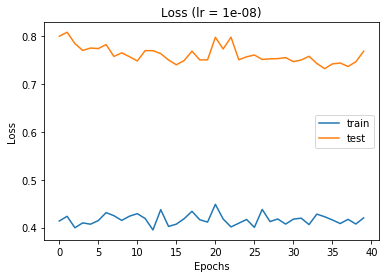

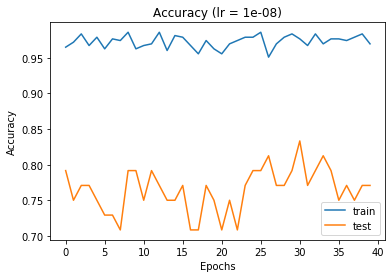

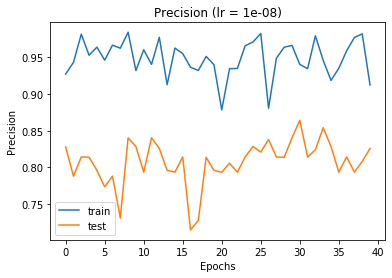

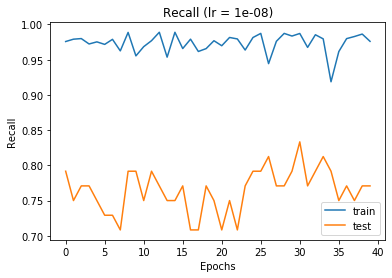

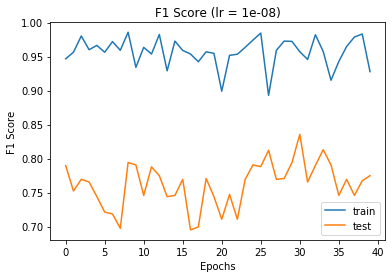

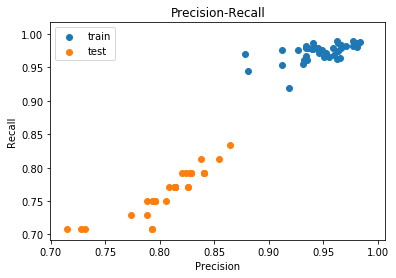

In [0]:
do_train(model_simple, loader_train_simple_img, loader_test_simple_img, 'simple_1', [(100, 1e-8)])

Utility function to perform evaluation without going through training, useful for checking models loaded through checkpoints.

In [0]:
def evaluate(model, loader_test, len_test):
  metrics = {
      'losses_test': [],
      'acc_test': []
  }
  best_acc = 0
  loss_fn = t.nn.CrossEntropyLoss()
  test_epoch_acc, test_epoch_loss = 0, 0

  model.eval()
  with t.no_grad():
    conf_matrix = np.zeros((4, 4))
    for x, y in loader_test:
      y_pred = model.forward(x)
      loss = loss_fn(y_pred, y)
      y_pred, y = to_numpy(y_pred), to_numpy(y)
      pred = y_pred.argmax(axis = 1)
      ratio = len(y) / len_test
      test_epoch_loss += (loss * ratio)
      test_epoch_acc += (sk.metrics.accuracy_score(y, pred) * ratio )
      cm = sk.metrics.confusion_matrix(y, pred, labels = list(range(4)))
      conf_matrix += cm
    metrics['losses_test'].append(test_epoch_loss)
    metrics['acc_test'].append(test_epoch_acc)
    print('Confusion matrix:\n', conf_matrix)
    errors = [sum(conf_matrix[i]) - conf_matrix[i][i] for i in range(len(conf_matrix))]
    print('Error distribution:\n', errors)
    
    error_distribution = [e / sum(errors) for e in errors]
    plt.bar(list(range(4)), error_distribution, align='center', alpha=0.5)
    plt.xticks(list(range(4)), list(range(4)))
    plt.xlabel('Classes')
    plt.ylabel('Error percentage')
    plt.show()
    
    print('Acc {}'.format(metrics['acc_test'][-1]))
  print('Ended training\n')  
  return metrics